# 0. Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (30, 5)
radius = 30

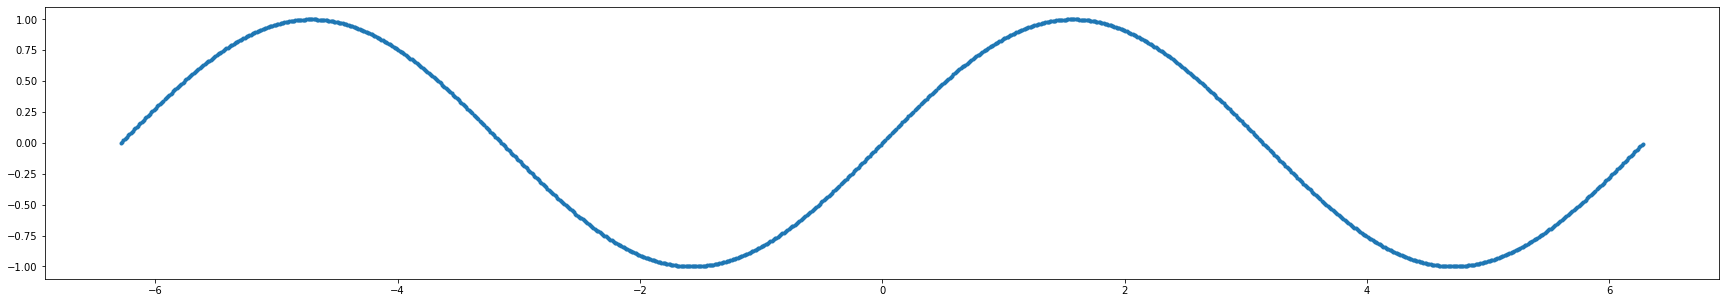

In [2]:
x = np.arange(-2 * np.pi, 2 * np.pi, 0.01)
y_true = np.sin(x)
plt.scatter(x, y_true, marker='.')

Initially, I tried uniform distribution and it doesn't look so right--the pattern is too obvious...

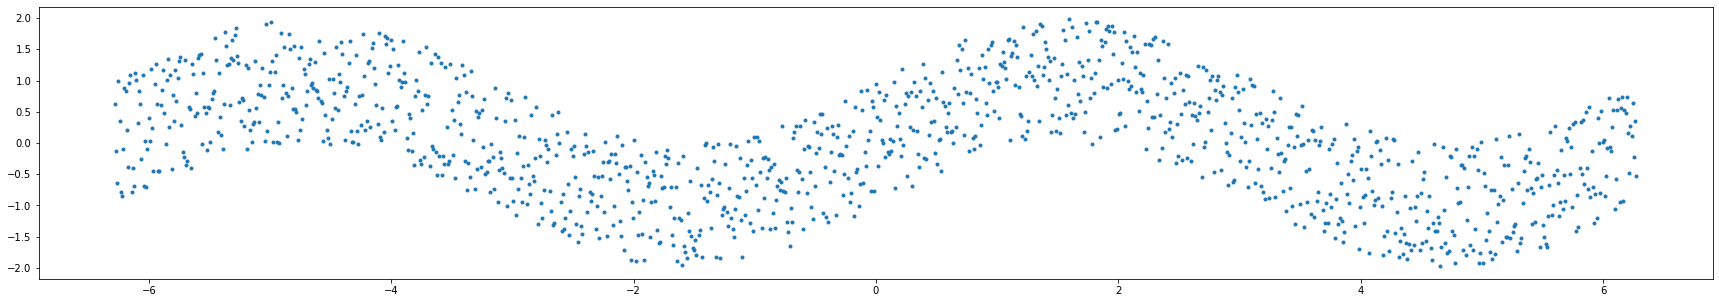

In [22]:
y = np.sin(x) + np.random.uniform(low=-1, high=1, size=len(x))
plt.scatter(x, y, marker='.')

But I am also concerned that drawing random noise from a normal distribution can be too easy for models--many models are built based on the assumptions that noise is normally distributed which is, of course, not always the case...

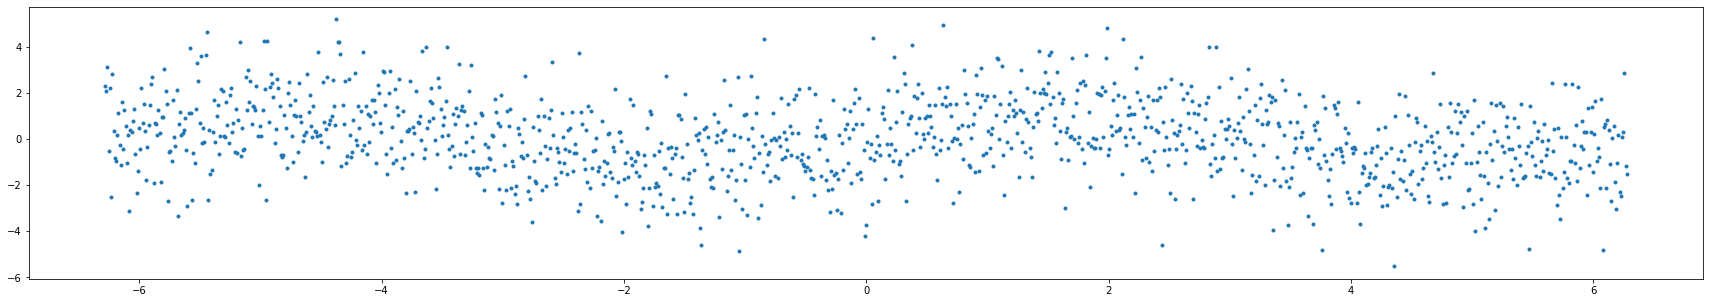

In [4]:
y = np.sin(x) + np.random.normal(loc=0, scale=1.5, size=len(x))
plt.scatter(x, y, marker='.')

In [5]:
_, _, y_train_true, y_test_true = train_test_split(x, y_true, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

# 1. Traditional machine learning model--from high bias to low bias
With some basic parameter tunning, the primitive decision tree regressor performs actually okay.

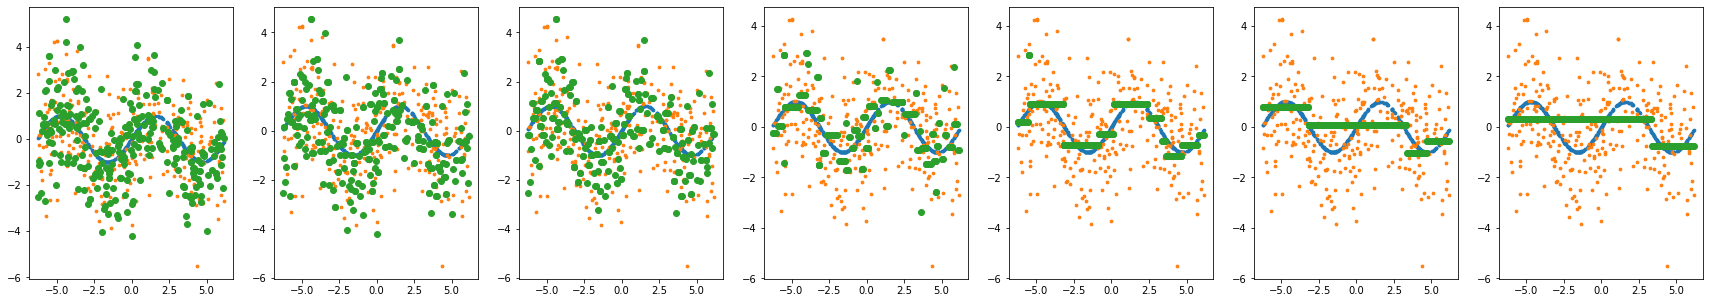

In [6]:
from sklearn.tree import DecisionTreeRegressor as dtr

fig, axes = plt.subplots(1, 7)
# First combination is default values
max_depth = [None, 32, 16, 8, 4, 2, 1]
min_samples_split = [2, 4, 8, 16, 32, 64, 128]

for i in range(len(axes)):
    regr = dtr(random_state=1, max_depth=max_depth[i], min_samples_split=min_samples_split[i]).fit(x_train.reshape(-1, 1), y_train)
    y_pred = regr.predict(x_test.reshape(-1, 1))
    axes[i].scatter(x_test, y_test_true, marker='.',s=radius)
    axes[i].scatter(x_test, y_test, marker='.',s=radius)
    axes[i].scatter(x_test, y_pred, marker='o')

plt.show()

But how about Random Forest? Worth trying.

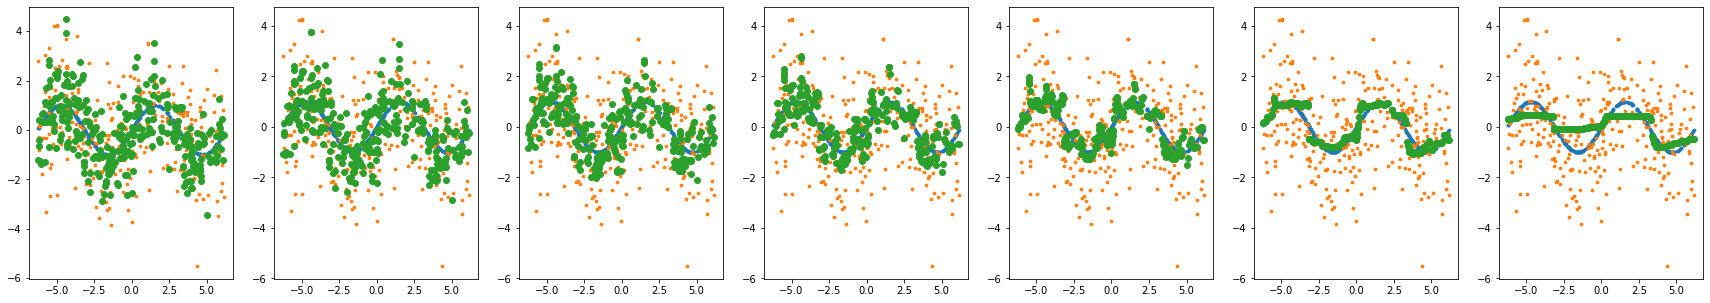

In [14]:
from sklearn.ensemble import RandomForestRegressor as rfr

fig, axes = plt.subplots(1, 7)
# First combination is default values
max_depth = [None, 64, 32, 16, 8, 4, 2]
min_samples_split = [2, 4, 8, 16, 32, 64, 128]

for i in range(len(axes)):
    regr = rfr(random_state=1, max_depth=max_depth[i], min_samples_split=min_samples_split[i]).fit(x_train.reshape(-1, 1), y_train)
    y_pred = regr.predict(x_test.reshape(-1, 1))
    axes[i].scatter(x_test, y_test_true, marker='.',s=radius)
    axes[i].scatter(x_test, y_test, marker='.',s=radius)
    axes[i].scatter(x_test, y_pred, marker='o')
    
plt.show()

It does have better performance compared with Decision Tree.

# 2. Neural network
Its performance is much better than I thought.

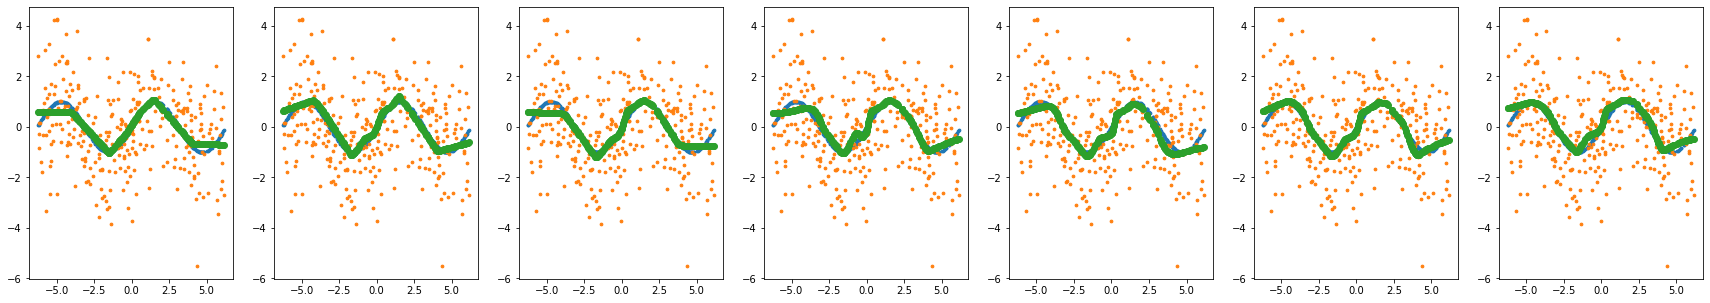

In [21]:
from sklearn.neural_network import MLPRegressor as mlp


fig, axes = plt.subplots(1, 7)
# First combination is default values
hidden_layer_sizes = [(100, ), (150, 150), (200, 200, 200), (250, 250, 250, 250), (300, 300, 300, 300, 300), (100, 100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100, 100)]
alpha = [0.0001, 0.00005, 0.00001, 0.000005, 0.000001, 0.0000005, 0.0000001, 0.00000005, ]

# Here we actually are making the model more and more flexible--the default parameter set turns out to have pretty low variance--too low already!
for i in range(len(axes)):
    regr = mlp(random_state=1, hidden_layer_sizes=hidden_layer_sizes[i], solver='adam', max_iter=500).fit(x_train.reshape(-1, 1), y_train)
    y_pred = regr.predict(x_test.reshape(-1, 1))
    axes[i].scatter(x_test, y_test_true, marker='.',s=radius)
    axes[i].scatter(x_test, y_test, marker='.',s=radius)
    axes[i].scatter(x_test, y_pred, marker='o')

plt.show()